#Tugas Lab
- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

- Anda diperbolehkan melakukan eksplorasi terhadap,

  - Metode pra pengolahan

  - Pemilihan fitur

  - Arsitektur ANN

  - Fungsi Aktivasi

- ANN diimplementasikan dengan menggunakan tensorflow.

#Import Library

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Load Dataset MNIST


In [6]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)

Train: (60000, 28, 28) (60000,)
Test : (10000, 28, 28) (10000,)


#Pra Pengolahan
Normalisasi

In [7]:
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

Flatten Citra

In [8]:
X_train = X_train.reshape(-1, 28*28)
X_test  = X_test.reshape(-1, 28*28)

One-hot encoding label

In [9]:
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

#Buat Model Arsitektur ANN

In [10]:
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#Compile Model

In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

#Training Model

In [12]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8765 - loss: 0.4311 - val_accuracy: 0.9713 - val_loss: 0.0984
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9708 - loss: 0.0979 - val_accuracy: 0.9782 - val_loss: 0.0787
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9797 - loss: 0.0632 - val_accuracy: 0.9740 - val_loss: 0.0888
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9860 - loss: 0.0443 - val_accuracy: 0.9775 - val_loss: 0.0730
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9884 - loss: 0.0347 - val_accuracy: 0.9780 - val_loss: 0.0768
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9911 - loss: 0.0268 - val_accuracy: 0.9800 - val_loss: 0.0780
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9935 - loss: 0.0191 - val_accuracy: 0.9798 - val_loss: 0.0788
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9939 - loss: 0.0173 - val_accuracy: 0

#Evaluasi Model

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Akurasi Test:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9778 - loss: 0.1131
Akurasi Test: 0.9811000227928162


#Prediksi dan Confusion Matrix

In [14]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


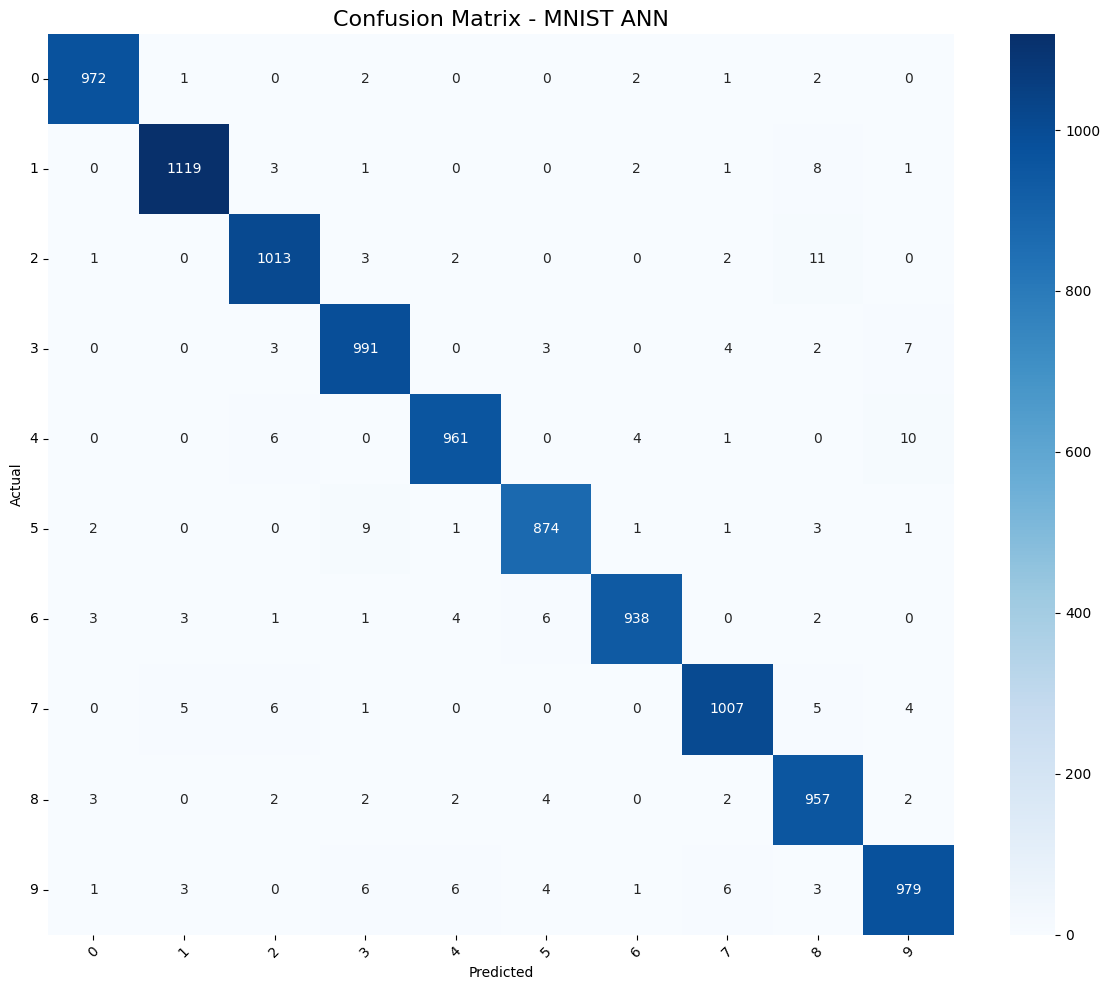

In [15]:
cm = confusion_matrix(y_true, y_pred_classes)

class_names = [str(i) for i in range(10)]

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.title("Confusion Matrix - MNIST ANN", fontsize=16)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#Visualisasi Akurasi dan Loss


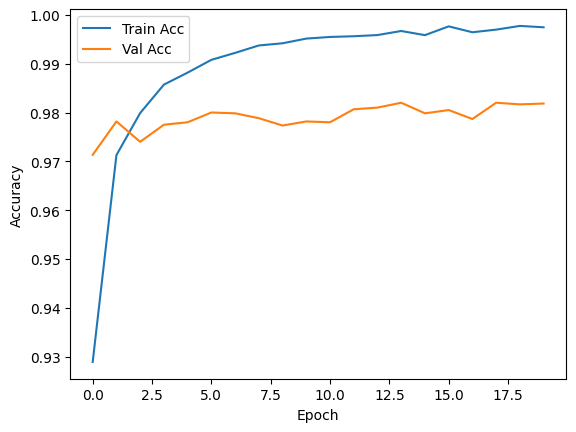

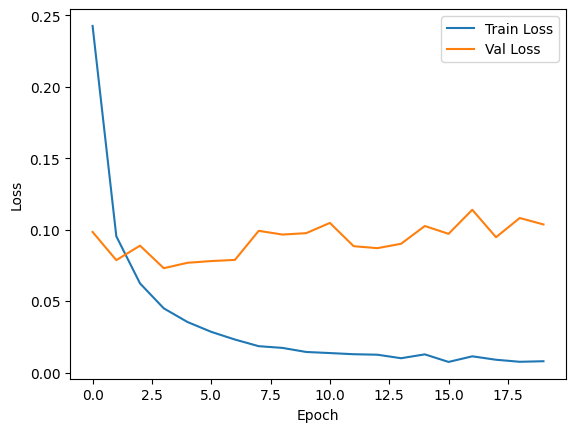

In [17]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()